In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**EDA and Preprocessing**

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
dataset.shape

(30, 2)

In [7]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


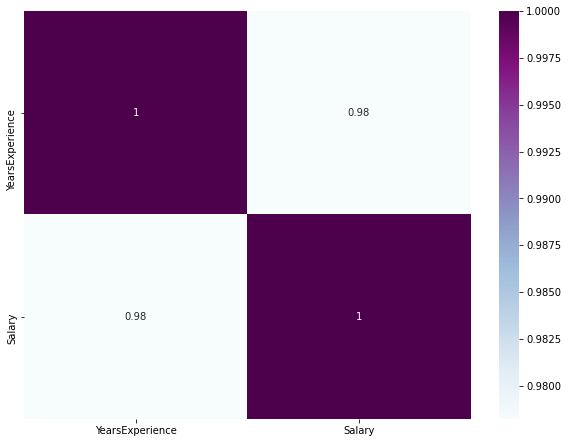

In [11]:
plt.figure(figsize=(10,7.5))
sns.heatmap(dataset.corr(), cmap = 'BuPu', annot = True)

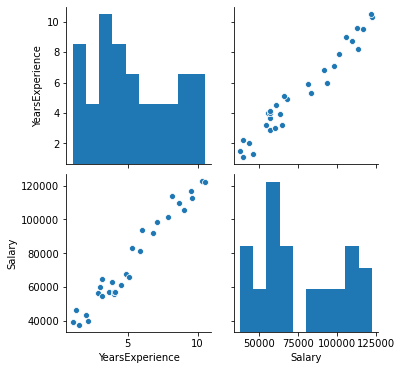

In [12]:
sns.pairplot(dataset)

**Data Preprocessing**

In [13]:
X = dataset.iloc[:,:-1].values   #independent variable
y = dataset.iloc[:,-1].values    #dependent varaiable

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)
print('Splitted Train-Test dataset details:')
print('Num of dataset in X -Train:', np.shape(X_train))
print('Num of dataset in Y -Train:', np.shape(y_train))
print('Num of dataset in X -Test:', np.shape(X_test))
print('Num of dataset in y -Test:', np.shape(y_test))

Splitted Train-Test dataset details:
Num of dataset in X -Train: (21, 1)
Num of dataset in Y -Train: (21,)
Num of dataset in X -Test: (9, 1)
Num of dataset in y -Test: (9,)


**Modeling**

In [19]:
#by importing pyforest we can generate almost 40 regression model
import pyforest
from lazypredict.Supervised import LazyRegressor
regressions = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = regressions.fit(X_train, X_test, y_train, y_test)
print(models)

 81%|██████████████████████████████████████████████████████████████████▍               | 34/42 [00:00<00:00, 35.54it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(21, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 37.80it/s]

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
LarsCV                                       0.97       0.97  4834.26   
LassoLarsIC                                  0.97       0.97  4834.26   
TransformedTargetRegressor                   0.97       0.97  4834.26   
RANSACRegressor                              0.97       0.97  4834.26   
LassoLarsCV                                  0.97       0.97  4834.26   
Lars                                         0.97       0.97  4834.26   
OrthogonalMatchingPursuit                    0.97       0.97  4834.26   
LinearRegression                             0.97       0.97  4834.26   
SGDRegressor                                 0.97       0.97  4834.30   
Lasso                                        0.97       0.97  4834.39   
LassoLars                                    0.97       0.97  4834.86   
LassoCV                                      0.97  